In [2]:
import pandas as pd

In [90]:
df = pd.read_csv('/content/reviews.csv', skip_blank_lines=True)
df.dropna()

reviews = []
for _ in list(df['reviews.text']):
  if type(_) is not float:
    reviews.append(_)

In [91]:
reviews[:5]

['This a fantastic white wine for any occasion!',
 'Tart, not sweet...very refreshing and delicious!',
 'I was given this wine so it was a delightful surprise to find that it has a flavorful and delicious taste! A new favorite!!!!',
 'This is a phenomenal wine and my new favorite red.',
 "4 750ml bottles for the price of two With way less packaging YES PLEASE! I was nervous it was too good to be true and I wouldn't like the wine but it's fantastic! I have to go a bit out of my way to get it (I live near a state line and it isn't sold in my state due to liquor laws) but it's worth it."]

In [100]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [101]:
stop_words = set(stopwords.words('english'))

In [104]:
filt_tokens_ = []
for doc in reviews:
  doc = doc.lower()  # convert to lowercase
  tokens = nltk.word_tokenize(doc)  # tokenize the sentence
  filt_tokens = []
  for token in tokens:
    # if the token is a stopword, a single character, or a number
    # do not append to filtered list.
    # else, append to filtered list of tokens.
    if token in stop_words:
      continue
    if len(token) < 1:
      continue
    if re.findall('[0-9]', token):
      continue
    filt_tokens.append(token)
  filt_tokens_.append(filt_tokens)

In [105]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(filt_tokens_)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in filt_tokens_]


print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 438
Number of documents: 2889


In [107]:
from gensim.models import LdaModel

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=5, 
                    random_state=100,
                    update_every=1,
                    chunksize=1,
                    passes=50,
                    alpha='auto',
                    per_word_topics=True)

In [108]:
topics = lda_model.show_topics(num_topics=20, num_words=10)

In [109]:
import re
filt_words_ = []
for topic in topics:
  words = re.findall('"[a-zA-Z]{1,}"', topic[1])
  filt_words = []
  for word in words:
    w = re.sub('"', '', word)
    filt_words.append(w)
  filt_words_.append(filt_words)

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

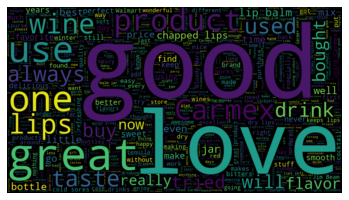

In [111]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(reviews))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

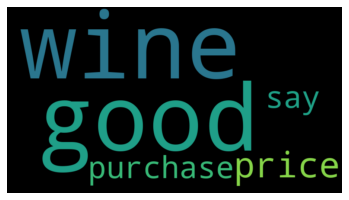

In [112]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(filt_words_[0]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

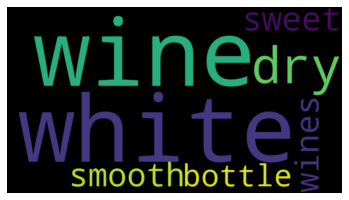

In [113]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(filt_words_[1]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

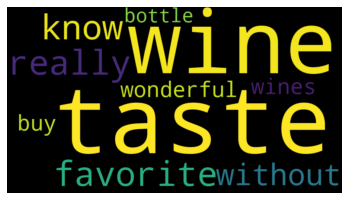

In [114]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(filt_words_[2]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

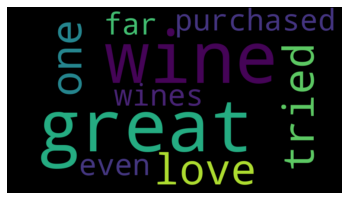

In [115]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(filt_words_[3]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

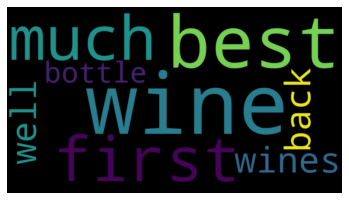

In [116]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate(" ".join(filt_words_[4]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()